# Amazon Fires 


## Context of the problem


Forest fires are a serious problem for the preservation of the Tropical Forests. Brazil has the largest rainforest on the planet, and the Amazon Forest is the most important. So, understanding the frequency and periodicity of the fires in the Amazon Forest can help the govermental entities to addopt new conservation polities to prevent fires and protect the Forests.

## Definition of the problem

The objective of this work is understanding the frequency of the fires in Amazon Forest througth the exploratory data analysis, using seaborn and matplolib libraries.


## Tasks for Data Analysis

1. Data Import
2. Data Cleaning
3. Exploratory Data Analysis
4. Interpretation of Results

### Setups

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import MaxNLocator, FuncFormatter
import calendar
import folium
from folium import plugins

### 1. Data Import

In [2]:
filepath = "./amazon.csv"

amazon_dataframe = pd.read_csv(filepath, encoding = "latin1")

columns = amazon_dataframe.columns

shape = amazon_dataframe.shape

print(amazon_dataframe.head(10), "\n")
print("Number of rows: ", shape[0], "\n")
print("Number of columns: ",  shape[1], "\n")
print("Columns of the dataframe: ", columns)

   year state    month  number        date
0  1998  Acre  Janeiro     0.0  1998-01-01
1  1999  Acre  Janeiro     0.0  1999-01-01
2  2000  Acre  Janeiro     0.0  2000-01-01
3  2001  Acre  Janeiro     0.0  2001-01-01
4  2002  Acre  Janeiro     0.0  2002-01-01
5  2003  Acre  Janeiro    10.0  2003-01-01
6  2004  Acre  Janeiro     0.0  2004-01-01
7  2005  Acre  Janeiro    12.0  2005-01-01
8  2006  Acre  Janeiro     4.0  2006-01-01
9  2007  Acre  Janeiro     0.0  2007-01-01 

Number of rows:  6454 

Number of columns:  5 

Columns of the dataframe:  Index(['year', 'state', 'month', 'number', 'date'], dtype='object')


### 2. Data Cleaning

#### Information about data types:

In [60]:
amazon_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
year      6454 non-null int64
state     6454 non-null object
month     6454 non-null object
number    6454 non-null float64
date      6454 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 176.5+ KB


#### Renaming name of month to english:

In [61]:
months_renaming = {"Janeiro": "January",
                  "Fevereiro": "February",
                  "Março": "March",
                  "Abril": "April",
                  "Maio": "May",
                  "Junho": "June",
                  "Julho": "July",
                  "Agosto": "August",
                  "Setembro": "September",
                  "Outubro": "October",
                  "Novembro": "November",
                  "Dezembro": "December"}

amazon_dataframe = amazon_dataframe.replace(months_renaming)

amazon_dataframe.head()

,year,state,month,number,date
0,1998,Acre,January,0.0,1998-01-01
1,1999,Acre,January,0.0,1999-01-01
2,2000,Acre,January,0.0,2000-01-01
3,2001,Acre,January,0.0,2001-01-01
4,2002,Acre,January,0.0,2002-01-01


#### Dropping Columns

In [62]:
amazon_dataframe["date"] = pd.to_datetime(amazon_dataframe["date"])

amazon_dataframe.date.dtype


dtype('<M8[ns]')

#### Dropping the duplicates rows:

In [63]:
number_duplicated_rows = amazon_dataframe.duplicated().sum()

print("Number of duplicated rows: ", number_duplicated_rows)

duplicated_rows = amazon_dataframe[amazon_dataframe.duplicated()]

print("Duplicated rows:\n ", duplicated_rows)


Number of duplicated rows:  32
Duplicated rows:
        year        state     month  number       date
259   2017      Alagoas   January    38.0 2017-01-01
2630  1998  Mato Grosso   January     0.0 1998-01-01
2650  1998  Mato Grosso  February     0.0 1998-01-01
2670  1998  Mato Grosso     March     0.0 1998-01-01
2690  1998  Mato Grosso     April     0.0 1998-01-01
2710  1998  Mato Grosso       May     0.0 1998-01-01
3586  1998      Paraiba   January     0.0 1998-01-01
3606  1998      Paraiba  February     0.0 1998-01-01
3621  2013      Paraiba  February     9.0 2013-01-01
3626  1998      Paraiba     March     0.0 1998-01-01
3646  1998      Paraiba     April     0.0 1998-01-01
3666  1998      Paraiba       May     0.0 1998-01-01
4542  1998          Rio   January     0.0 1998-01-01
4562  1998          Rio  February     0.0 1998-01-01
4582  1998          Rio     March     0.0 1998-01-01
4585  2001          Rio     March     0.0 2001-01-01
4590  2006          Rio     March     8.0 2006-01

In [64]:
amazon_dataframe.drop_duplicates(inplace=True)

print("New dimensions of the dataset: ", amazon_dataframe.shape)

New dimensions of the dataset:  (6422, 5)


#### Dropping null values:

In [65]:
number_null_values = amazon_dataframe.isnull().sum()

print("Number of null values:\n", number_null_values)

Number of null values:
 year      0
state     0
month     0
number    0
date      0
dtype: int64


### 3. Exploratory Data Analysis

#### Total of Fires

In [66]:
print("Total of fires registed: ", amazon_dataframe.shape[0])

Total of fires registed:  6422


#### Statistic Description

In [67]:
amazon_dataframe.describe()

,year,number
count,6422.000000,6422.000000
mean,2007.490969,108.815178
std,5.731806,191.142482
min,1998.000000,0.000000
25%,2003.000000,3.000000
50%,2007.000000,24.497000
75%,2012.000000,114.000000
max,2017.000000,998.000000


#### Fires Distribution

Text(0.5, 1.0, 'Fires Distribution')

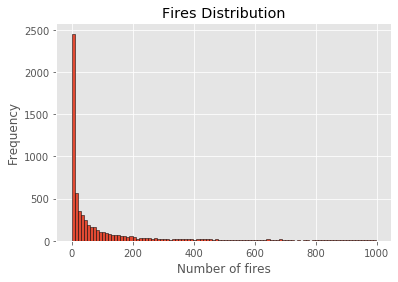

In [68]:
plt.hist(amazon_dataframe["number"], bins=100, edgecolor ="k")
plt.xlabel("Number of fires")
plt.ylabel("Frequency")
plt.title("Fires Distribution")


#### Evolution of Fires in Brazil between 1998 and 2017


In [82]:
fires_year = amazon_dataframe.groupby(amazon_dataframe["year"]).count().number
print(fires_year)

year
1998    304
1999    324
2000    324
2001    321
2002    324
2003    324
2004    323
2005    324
2006    323
2007    322
2008    323
2009    323
2010    324
2011    324
2012    324
2013    323
2014    324
2015    324
2016    324
2017    296
Name: number, dtype: int64


(1998, 2017)

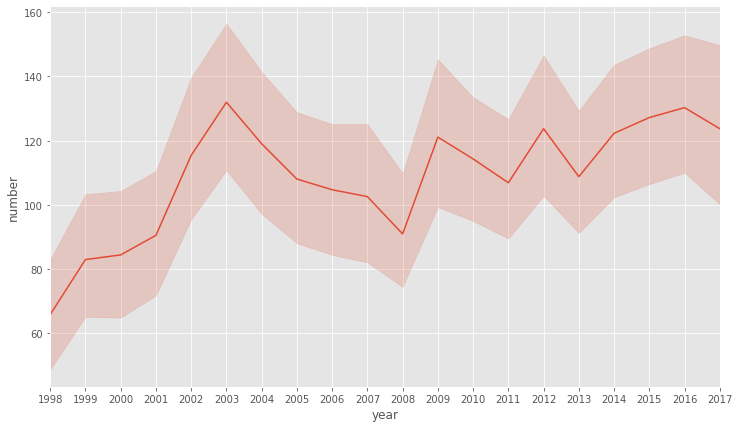

In [69]:
plt.figure(figsize=(12,7))
plot = sns.lineplot(data=amazon_dataframe, x="year", y="number", markers=True)
plot.xaxis.set_major_locator(plt.MaxNLocator(19))
plot.set_xlim(1998, 2017)

#### Distribution of Fires by Month 

In [94]:
month_fires = amazon_dataframe.groupby(amazon_dataframe["month"]).number.count().reset_index()
month_fires.sort_values("number", ascending=False)
print(month_fires)


        month  number
0       April     534
1      August     540
2    December     513
3    February     535
4     January     535
5        July     539
6        June     539
7       March     534
8         May     533
9    November     540
10    October     540
11  September     540


Text(0, 0.5, 'Number of fires')

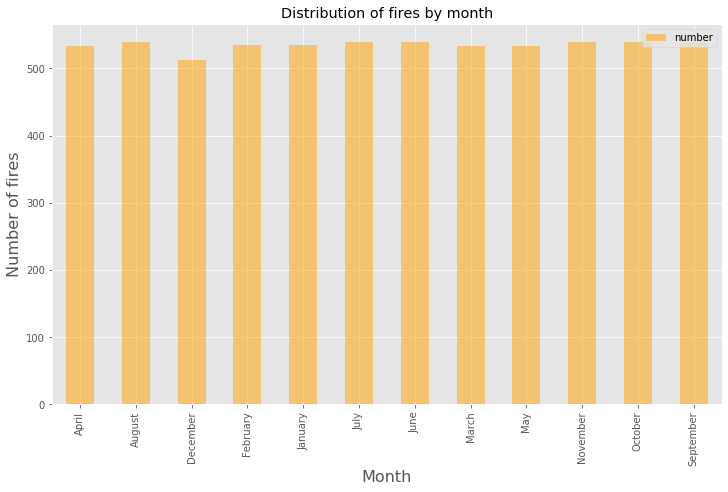

In [87]:
plt.style.use("ggplot")

month_fires.plot(x="month", y="number", kind="bar", figsize=(12,7), color="orange", alpha = 0.5)

plt.title("Distribution of fires by month")
plt.xlabel("Month", fontsize=16)
plt.ylabel("Number of fires", fontsize=16)

#### Distribution of Fires by Day of the Week

In [19]:
fires_weekday = amazon_dataframe.groupby(amazon_dataframe["date"].dt.dayofweek).count().date

fires_weekday.index = [calendar.day_name[x] for x in range(0,7)]
print(fires_weekday)

Monday        643
Tuesday       970
Wednesday     648
Thursday     1274
Friday        972
Saturday      972
Sunday        943
Name: date, dtype: int64


Text(0, 0.5, 'Number of fires')

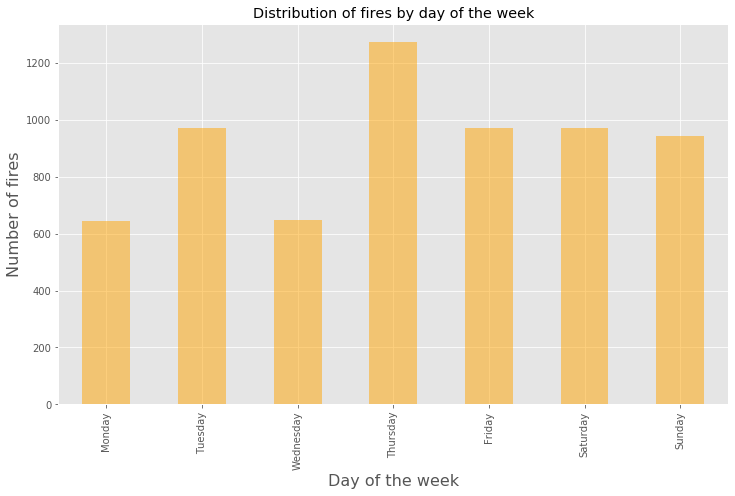

In [20]:
plt.style.use("ggplot")

fires_weekday.plot(kind="bar", figsize=(12,7), color="orange", alpha = 0.5)

plt.title("Distribution of fires by day of the week")
plt.xlabel("Day of the week", fontsize=16)
plt.ylabel("Number of fires", fontsize=16)

#### Distribution of Fires by State

In [21]:
fires_state = amazon_dataframe.groupby(amazon_dataframe["state"]).count().number
print(fires_state)

state
Acre                239
Alagoas             239
Amapa               239
Amazonas            239
Bahia               239
Ceara               239
Distrito Federal    239
Espirito Santo      239
Goias               239
Maranhao            239
Mato Grosso         473
Minas Gerais        239
Paraiba             472
Pará                239
Pernambuco          239
Piau                239
Rio                 697
Rondonia            239
Roraima             239
Santa Catarina      239
Sao Paulo           239
Sergipe             239
Tocantins           239
Name: number, dtype: int64


Text(0, 0.5, 'Number of fires')

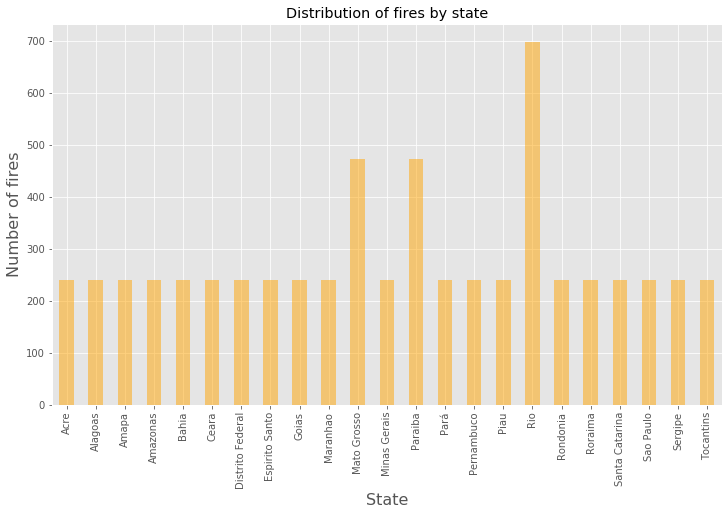

In [22]:
plt.style.use("ggplot")

fires_state.plot(kind="bar", figsize=(12,7), color="orange", alpha=0.5)

plt.title("Distribution of fires by state")
plt.xlabel("State", fontsize=16)
plt.ylabel("Number of fires", fontsize=16)

After the analysis of the distribution of the fires by year, month, day of the week and states, it was realized a detailded analysis of the distribution of the fires in the states with high number of fires.

So, it was chosen the Mato Grosso, Paraiba and Rio states.

#### Analysis of the Distibution of Fires in the Mato Grosso State

In [23]:
mato_grosso_dataframe = amazon_dataframe[amazon_dataframe["state"] == "Mato Grosso"]
print(mato_grosso_dataframe.head())

number_fires_mato_grosso = mato_grosso_dataframe.shape[0]
print("\nNumber of fires in Mato Grosso State: ", number_fires_mato_grosso)


      year        state    month  number       date
2391  1998  Mato Grosso  January     0.0 1998-01-01
2392  1999  Mato Grosso  January    39.0 1999-01-01
2393  2000  Mato Grosso  January    44.0 2000-01-01
2394  2001  Mato Grosso  January    44.0 2001-01-01
2395  2002  Mato Grosso  January   172.0 2002-01-01

Number of fires in Mato Grosso State:  473


In [24]:
year_fires_mato_grosso = mato_grosso_dataframe.groupby(mato_grosso_dataframe["year"]).count().number
print(year_fires_mato_grosso)

year
1998    19
1999    24
2000    24
2001    24
2002    24
2003    24
2004    24
2005    24
2006    24
2007    24
2008    24
2009    24
2010    24
2011    24
2012    24
2013    24
2014    24
2015    24
2016    24
2017    22
Name: number, dtype: int64


Text(0, 0.5, 'Number of fires')

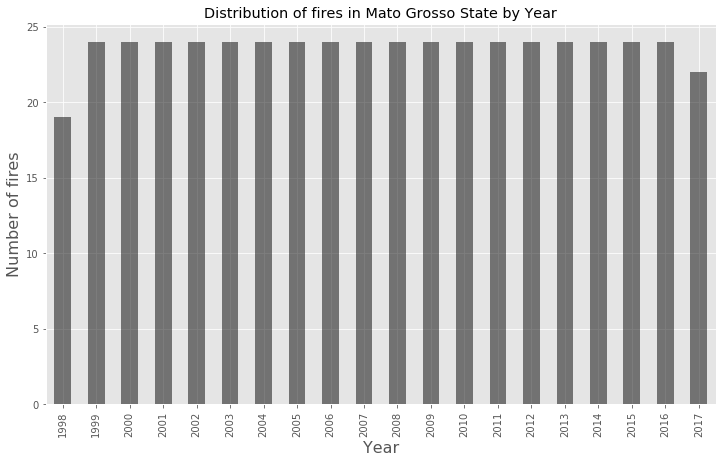

In [25]:
plt.style.use("ggplot")

year_fires_mato_grosso.plot(kind="bar", figsize=(12,7), color="black", alpha=0.5)

plt.title("Distribution of fires in Mato Grosso State by Year")
plt.xlabel("Year", fontsize=16)
plt.ylabel("Number of fires", fontsize=16)

In [26]:
month_fires_mato_grosso = mato_grosso_dataframe.groupby(mato_grosso_dataframe["month"]).count().number
print(month_fires_mato_grosso)

month
January      39
February     39
March        39
April        39
May          39
June         40
July         40
August       40
September    40
October      40
November     40
December     38
Name: number, dtype: int64


Text(0, 0.5, 'Number of fires')

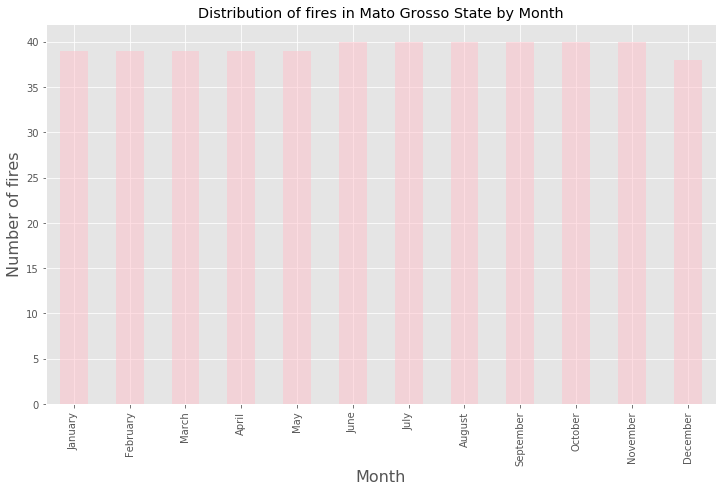

In [27]:
plt.style.use("ggplot")

month_fires_mato_grosso.plot(kind="bar", figsize=(12,7), color="pink", alpha=0.5)

plt.title("Distribution of fires in Mato Grosso State by Month")
plt.xlabel("Month", fontsize=16)
plt.ylabel("Number of fires", fontsize=16)

In [28]:
day_week_fires_mato_grosso = mato_grosso_dataframe.groupby(mato_grosso_dataframe["date"].dt.dayofweek).count().date
day_week_fires_mato_grosso.index = [calendar.day_name[x] for x in range(0,7)]
print(day_week_fires_mato_grosso)

Monday       48
Tuesday      72
Wednesday    48
Thursday     91
Friday       72
Saturday     72
Sunday       70
Name: date, dtype: int64


Text(0, 0.5, 'Number of fires')

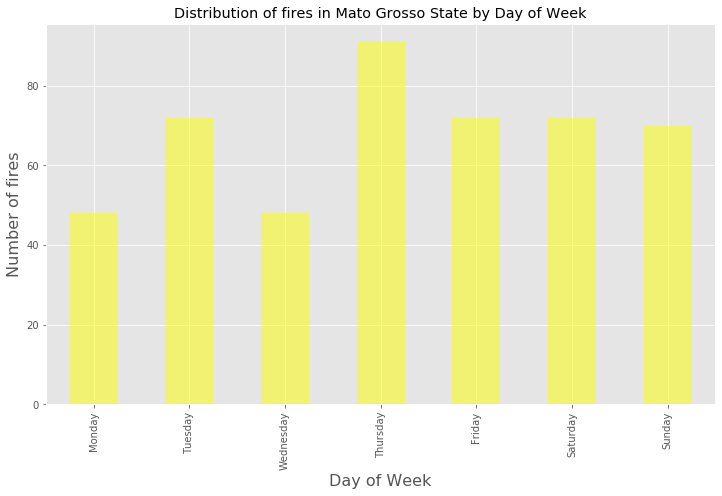

In [29]:
plt.style.use("ggplot")

day_week_fires_mato_grosso.plot(kind="bar", figsize=(12,7), color="yellow", alpha=0.5)

plt.title("Distribution of fires in Mato Grosso State by Day of Week")
plt.xlabel("Day of Week", fontsize=16)
plt.ylabel("Number of fires", fontsize=16)

#### Analysis of the Distribution of Fires in Paraiba State

In [30]:
paraiba_fires_dataframe = amazon_dataframe[amazon_dataframe["state"] == "Paraiba"]
print(paraiba_fires_dataframe.head())

number_fires_paraiba = paraiba_fires_dataframe.shape[0]
print("Number of fires in Paraiba: ", number_fires_paraiba)

      year    state    month  number       date
3347  1998  Paraiba  January     0.0 1998-01-01
3348  1999  Paraiba  January    26.0 1999-01-01
3349  2000  Paraiba  January     0.0 2000-01-01
3350  2001  Paraiba  January    11.0 2001-01-01
3351  2002  Paraiba  January     5.0 2002-01-01
Number of fires in Paraiba:  472


In [31]:
year_fires_paraiba = paraiba_fires_dataframe.groupby(paraiba_fires_dataframe["year"]).count().number
print(year_fires_paraiba)

year
1998    19
1999    24
2000    24
2001    24
2002    24
2003    24
2004    24
2005    24
2006    24
2007    24
2008    24
2009    24
2010    24
2011    24
2012    24
2013    23
2014    24
2015    24
2016    24
2017    22
Name: number, dtype: int64


Text(0, 0.5, 'Number of fires')

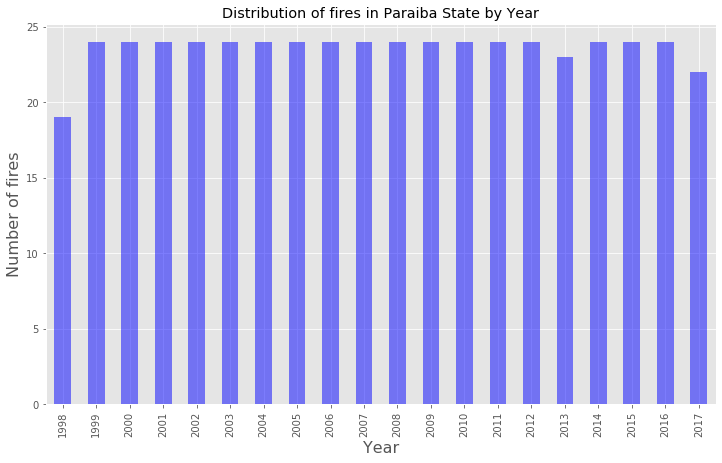

In [32]:
plt.style.use("ggplot")

year_fires_paraiba.plot(kind="bar", figsize=(12,7), color="blue", alpha=0.5)

plt.title("Distribution of fires in Paraiba State by Year")
plt.xlabel("Year", fontsize=16)
plt.ylabel("Number of fires", fontsize=16)

In [33]:
month_fires_paraiba = paraiba_fires_dataframe.groupby(paraiba_fires_dataframe["month"]).count().number
print(month_fires_paraiba)

month
January      39
February     38
March        39
April        39
May          39
June         40
July         40
August       40
September    40
October      40
November     40
December     38
Name: number, dtype: int64


Text(0, 0.5, 'Number of fires')

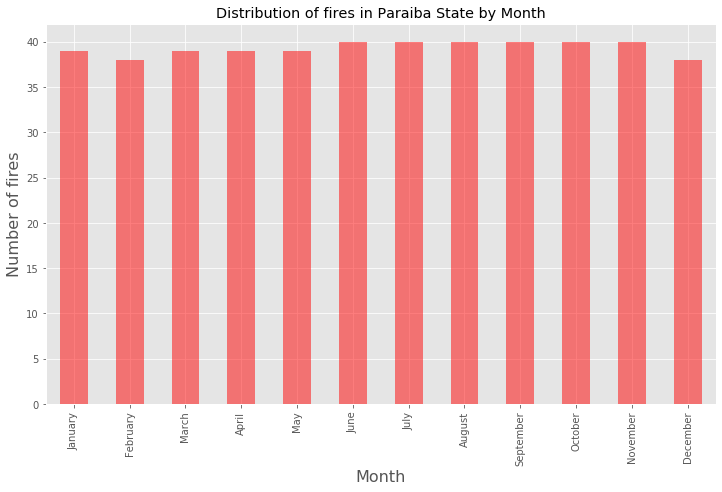

In [34]:
plt.style.use("ggplot")

month_fires_paraiba.plot(kind="bar", figsize=(12,7), color="red", alpha=0.5)

plt.title("Distribution of fires in Paraiba State by Month")
plt.xlabel("Month", fontsize=16)
plt.ylabel("Number of fires", fontsize=16)

In [35]:
day_week_fires_paraiba = paraiba_fires_dataframe.groupby(paraiba_fires_dataframe["date"].dt.dayofweek).count().date
day_week_fires_paraiba.index = [calendar.day_name[x] for x in range(0,7)]
print(day_week_fires_paraiba)


Monday       48
Tuesday      71
Wednesday    48
Thursday     91
Friday       72
Saturday     72
Sunday       70
Name: date, dtype: int64


Text(0, 0.5, 'Number of fires')

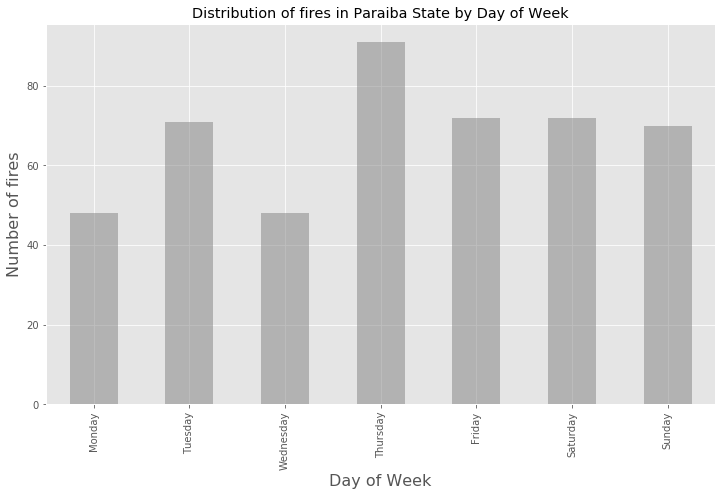

In [36]:
plt.style.use("ggplot")

day_week_fires_paraiba.plot(kind="bar", figsize=(12,7), color="gray", alpha=0.5)

plt.title("Distribution of fires in Paraiba State by Day of Week")
plt.xlabel("Day of Week", fontsize=16)
plt.ylabel("Number of fires", fontsize=16)

#### Analysis of the Distribution of Fires in Rio State

In [37]:
rio_fires_dataframe = amazon_dataframe[amazon_dataframe["state"] == "Rio"]
print(rio_fires_dataframe.head())

number_fires_rio = rio_fires_dataframe.shape[0]
print("Number of fires in Rio: ", number_fires_rio)

      year state    month  number       date
4303  1998   Rio  January     0.0 1998-01-01
4304  1999   Rio  January     0.0 1999-01-01
4305  2000   Rio  January     0.0 2000-01-01
4306  2001   Rio  January     0.0 2001-01-01
4307  2002   Rio  January     0.0 2002-01-01
Number of fires in Rio:  697


In [38]:
year_fires_rio = rio_fires_dataframe.groupby(rio_fires_dataframe["year"]).count().number
print(year_fires_rio)

year
1998    26
1999    36
2000    36
2001    33
2002    36
2003    36
2004    35
2005    36
2006    35
2007    34
2008    35
2009    35
2010    36
2011    36
2012    36
2013    36
2014    36
2015    36
2016    36
2017    32
Name: number, dtype: int64


Text(0, 0.5, 'Number of fires')

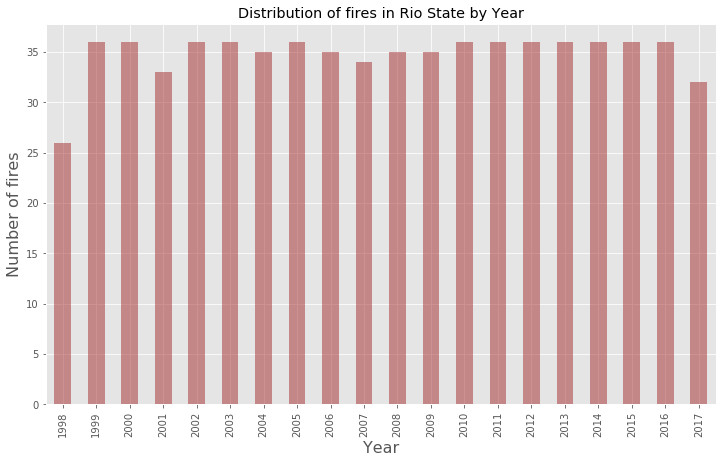

In [39]:
plt.style.use("ggplot")

year_fires_rio.plot(kind="bar", figsize=(12,7), color="brown", alpha=0.5)

plt.title("Distribution of fires in Rio State by Year")
plt.xlabel("Year", fontsize=16)
plt.ylabel("Number of fires", fontsize=16)

In [40]:
month_fires_rio = rio_fires_dataframe.groupby(rio_fires_dataframe["month"]).count().number
print(month_fires_rio)

month
January      57
February     58
March        56
April        56
May          55
June         59
July         59
August       60
September    60
October      60
November     60
December     57
Name: number, dtype: int64


Text(0, 0.5, 'Number of fires')

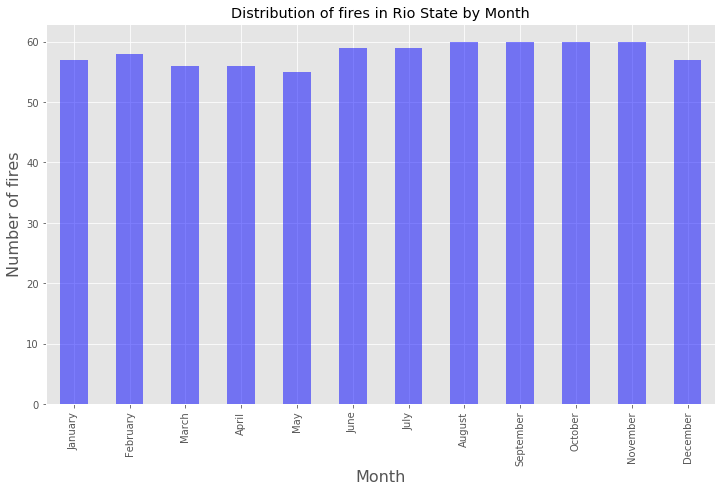

In [41]:
plt.style.use("ggplot")

month_fires_rio.plot(kind="bar", figsize=(12,7), color="blue", alpha=0.5)

plt.title("Distribution of fires in Rio State by Month")
plt.xlabel("Month", fontsize=16)
plt.ylabel("Number of fires", fontsize=16)

In [42]:
day_week_fires_rio = rio_fires_dataframe.groupby(rio_fires_dataframe["date"].dt.dayofweek).count().date
day_week_fires_rio.index = [calendar.day_name[x] for x in range(0,7)]
print(day_week_fires_rio)

Monday        67
Tuesday      107
Wednesday     72
Thursday     132
Friday       108
Saturday     108
Sunday       103
Name: date, dtype: int64


Text(0, 0.5, 'Number of fires')

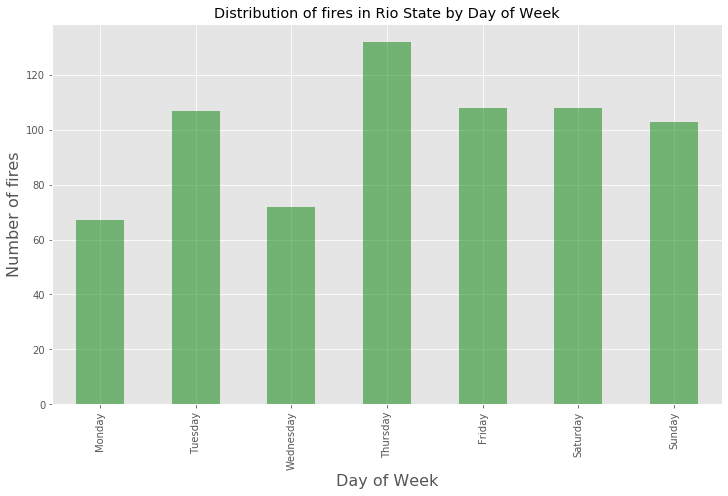

In [43]:
plt.style.use("ggplot")

day_week_fires_rio.plot(kind="bar", figsize=(12,7), color="green", alpha=0.5)

plt.title("Distribution of fires in Rio State by Day of Week")
plt.xlabel("Day of Week", fontsize=16)
plt.ylabel("Number of fires", fontsize=16)

#### Fires Location Analysis

#### New columns: Latitude and Longitude

In [84]:
latitude={
    'Acre':-9.02,'Alagoas':-9.57,'Amapa':02.05,'Amazonas':-5.00,'Bahia':-12.00,'Ceara':-5.00,
          
    'Distrito Federal':-15.45,'Espirito Santo':-20.00,'Goias':-15.55,'Maranhao':-5.00,'Mato Grosso':-14.00
      
    ,'Minas Gerais':-18.50,'Pará':-3.20,'Paraiba':-7.00,'Pernambuco':-8.00,'Piau':-7.00,'Rio':-22.90,
          
    'Rondonia':-11.00,'Roraima':-2.00,'Santa Catarina':-27.25,'Sao Paulo':-23.32,'Sergipe':-10.30,
         
    'Tocantins':-10.00
    }


longitude={
    'Acre':-70.8120,'Alagoas':-36.7820,'Amapa':-50.50,'Amazonas':-65.00,'Bahia':-42.00,'Ceara':-40.00,
    
    'Distrito Federal':-47.45,'Espirito Santo':-40.45,'Goias':-50.10,'Maranhao':-46.00,'Mato Grosso':-55.00,
    
    'Minas Gerais':-46.00,'Pará':-52.00,'Paraiba':-36.00,'Pernambuco':-37.00,'Piau':-73.00, 'Rio':-43.17,
    
    'Rondonia':-63.00,'Roraima':-61.30,'Santa Catarina':-48.30,'Sao Paulo':-46.37,'Sergipe':-37.30,
    
    'Tocantins':-48.00
    }

amazon_dataframe["latitude"] = amazon_dataframe["state"].map(latitude)
amazon_dataframe["longitude"] = amazon_dataframe["state"].map(longitude)
amazon_dataframe.head()

,year,state,month,number,date,latitude,longitude
0,1998,Acre,January,0.0,1998-01-01,-9.02,-70.812
1,1999,Acre,January,0.0,1999-01-01,-9.02,-70.812
2,2000,Acre,January,0.0,2000-01-01,-9.02,-70.812
3,2001,Acre,January,0.0,2001-01-01,-9.02,-70.812
4,2002,Acre,January,0.0,2002-01-01,-9.02,-70.812


#### Distribution of Fires between 1998-2017 by Geospatial Localization 

In [85]:

brasil_map = folium.Map(location=[-16.1237611, -59.9219642], zoom_start=3.5, tiles='Stamen Terrain')
brasil_map

fires = plugins.MarkerCluster().add_to(brasil_map) 

for latitude, longitude in zip(amazon_dataframe.latitude, amazon_dataframe.longitude):
    folium.Marker(
        location=[latitude, longitude],
        icon=None,
    ).add_to(fires)
    
brasil_map

### 4. Interpretation of Results

- The number of fire in the last 20 years increased, where Mato Grosso, Paraiba and Rio were the states with a high number of fires. 
- Most fires happened during the spring/summer months such as September, October, November, December, January, and February. However, the number of fires in the remaining months (autumn/winter) still high. The explanation for these observations is the [Tropical Climate in Brazil ](https://seasonsyear.com/Brazil) with temperatures of 17$^{\circ}$C - 27$^{\circ}$C and precipitation of 12mm-240mm 
- The days of the week with a high number of registered fires are tuesday, thursday and weekend.